# Plot history

In this file, we are going to plot the results of our simulation.

We will perform the following actions:
* Plot the real values of the PDE function
* Plot the estimated PDE values generated using Monte Carlo simulation

Please run the following codes:

## Table of Content

- [1 - Packages](#1)
- [2 - Plotting the results of our simulation](#2)
    - [2.1 - Load the relevant csv files](#2-1)
    - [2.2 - Plot the PDE in one dimension: fix x in {2, 3, ..., 10} and varies t within [0, x-1]](#2-2)

<a name='1'></a>
## 1 - Packages

Run the cell below to import all the libraries you'll need:

In [1]:
# From system
import os
import shutil
from pathlib import Path
import random

# Data structure
import numpy as np
import pandas as pd
import json
import csv

# Plotting graph
from matplotlib import pyplot as plt

<a name='2'></a>
## 2 - Plotting the results of our simulation

<a name='2-1'></a>
### 2.1 - Load the relevant csv files

In [2]:
np_dictionary = {}

dir_name = "results"
os_listdir = os.listdir(dir_name)
for file_name in os_listdir:
    file_path = os.path.join(dir_name, file_name)
    data =  pd.read_csv(file_path, delimiter=',', dtype=None, header=None)
    np_dictionary[file_name[:-4]] = data

<a name='2-2'></a>
### 2.2 - Plot the PDE in one dimension: fix z=(-1+0i,-1+0i) and varies t within [0, 1.8]

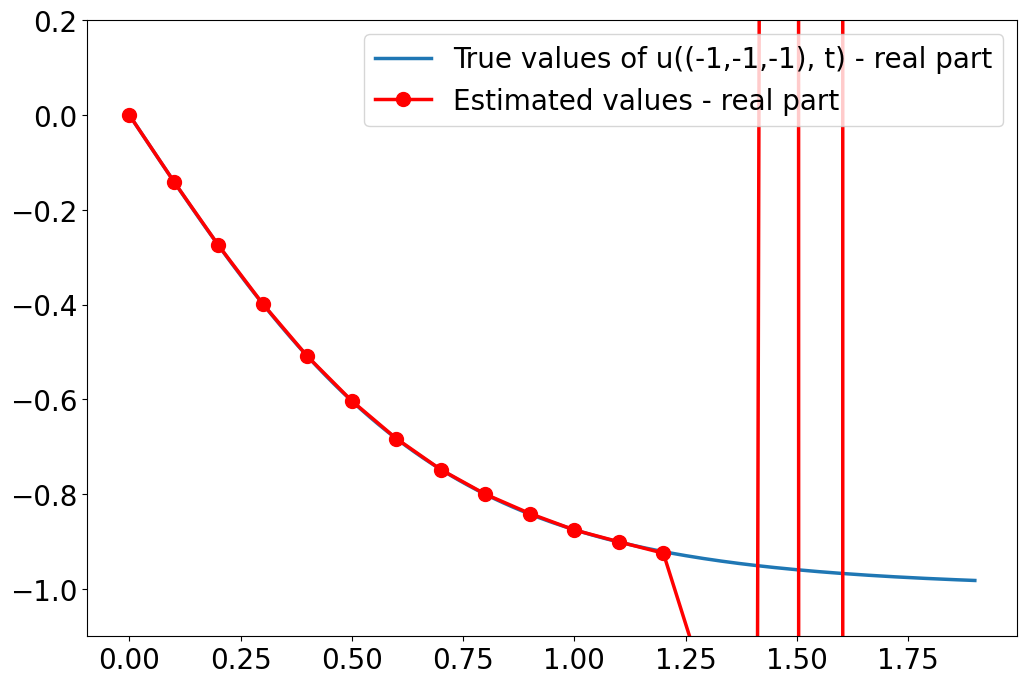

In [3]:
impose_ylim = True
y_lim = [-1.1,0.2]

true_values_real = np.asarray(np_dictionary["analytic"])[0,:]
true_values_real = np.reshape(true_values_real, (301,))[0:191]
t_values = np.arange(0, 1.91, 0.01)
estimated_values_real = np.asarray(np_dictionary["monte_carlo"])[0,:]
estimated_values_real = np.reshape(estimated_values_real, (31,))[0:19]
t_estimated = np.arange(0, 1.9, 0.1)

plt.figure(figsize=(12, 8))
plt.plot(t_values, true_values_real, label='True values of u((-1,-1,-1), t) - real part', lw=2.5)
plt.plot(t_estimated, estimated_values_real, 'ro-', label='Estimated values - real part', lw=2.5, ms=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.ylabel('true vs estimated values - real part')
if impose_ylim:
    plt.ylim(y_lim)
# plt.xlabel('t values')
# plt.axvline(x=0.32,color='red')

# plt.title('True vs estimated values of u((-1,-1,-1), t) - real part')
plt.legend(loc='upper right',fontsize=20)
plt.show()

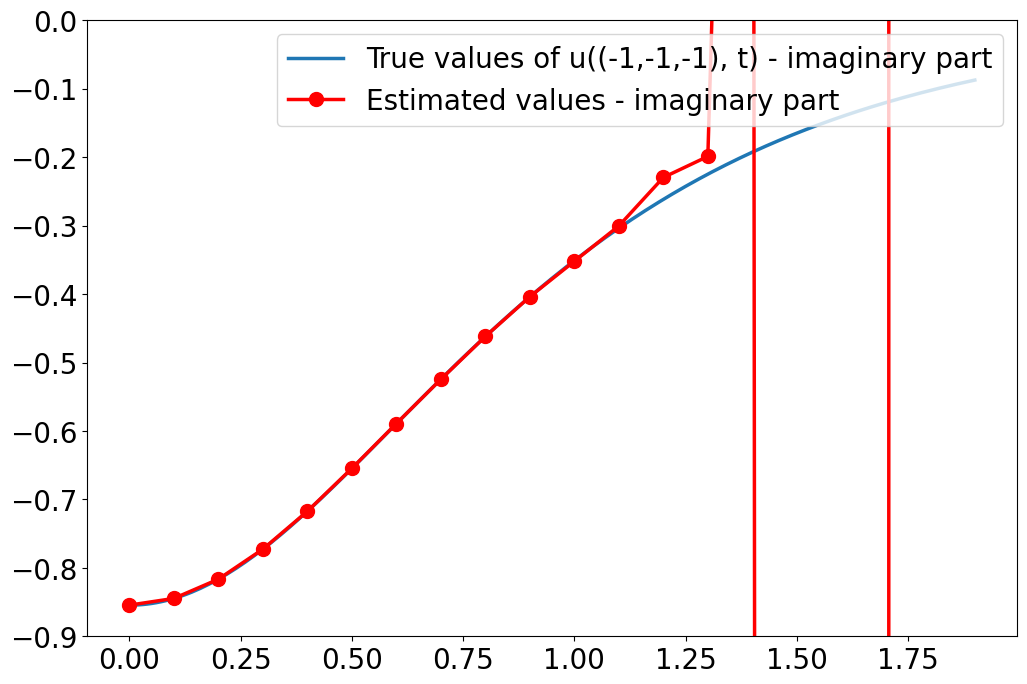

In [4]:
impose_ylim = True
y_lim = [-0.9,0]

true_values_imaginary = np.asarray(np_dictionary["analytic"])[1,:]
true_values_imaginary = np.reshape(true_values_imaginary, (301,))[0:191]
t_values = np.arange(0, 1.91, 0.01)
estimated_values_imaginary = np.asarray(np_dictionary["monte_carlo"])[1,:]
estimated_values_imaginary = np.reshape(estimated_values_imaginary, (31,))[0:19]
t_estimated = np.arange(0, 1.9, 0.1)

plt.figure(figsize=(12, 8))
plt.plot(t_values, true_values_imaginary, label='True values of u((-1,-1,-1), t) - imaginary part', lw=2.5)
plt.plot(t_estimated, estimated_values_imaginary, 'ro-', label='Estimated values - imaginary part', lw=2.5, ms=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.ylabel('true vs estimated values - imaginary part')
plt.ylabel('')
if impose_ylim:
    plt.ylim(y_lim)
# plt.xlabel('t values')
plt.xlabel('')
# plt.axvline(x=0.32,color='red')

# plt.title('True vs estimated values of u((-1,-1,-1), t) - imaginary part')
plt.legend(loc='upper right',fontsize=20)
plt.show()

<a name='3'></a>
## 3 - Finding the bound

We know that for $d=1$, the cubic nonlinear Klein-Gordon equation with a defocusing $+u^3$ term and a standard (positive-mass) $-u$ term
\begin{aligned}
\begin{cases}
    \partial_{tt}u(z,t)-(i)^2\Delta u(z,t) = -u(z,t) + (u(z,t))^3 \qquad (z,t) \in \mathbb{C}^2 \times (0,\infty) \\
    u(z,0) = \phi(z) = \tanh(\frac{i}{3\sqrt{2}}(z_1+z_2+z_3))\\
    \partial_t u(z,0) = \psi(z) = -\sqrt{\frac{2}{3}}sech^2(\frac{i}{3\sqrt{2}}(z_1+z_2+z_3))
\end{cases}
\end{aligned}

admits a classical solution on the interval $[0,t_0]$ if both sufficient conditions are satisfied:

1. $\phi, \psi \in C^2(\overline{B}_{i}(z_0,t_0))$
2. $e^{3t_0^2} -e^{t_0^2} <  \Big(2 \max (1  , \Vert \phi \Vert_{\infty, \overline{B}_{i}(z_0,t_0)} + t_0 \Vert \psi \Vert_{\infty, \overline{B}_{i}(z_0,t_0)} )^2
\Big)^{-1}$

where 
$$
\overline{B}_{i}(z_0,t_0) :=\Bigl\{z\in\mathbb{C}^3:\exists y\in\mathbb{R}^3\text{ such that }z=z_0+iy \text{ and } |y|\le t_0 \Bigr\}
$$
given fixed $(z_0, t_0) \in \mathbb{C}^3 \times (0, \infty)$. 

Since our evaluation point is set at $(-1+0i, +1+0i, +1+0i)$, it is natural that we take $z_0=(-1+0i, -1+0i, -1+0i)$. Condition 1 is satisfied so long as the set $\overline{B}_{i}((-1,-1,-1),t_0)$ does not contain a pole. Our objective is to find the maximum $t_0$ such that Condition 2 is also satisfied.

** Note: $z_0$ refers to a fixed 3-dimensional complex point in $\mathbb{C}^3$. Given a particular $z \in \mathbb{C}^3$, $z_1, z_2, z_3$ refers to its first and second complex coordinate respectively, i.e. $z=(z_1,z_2, z_3)$. So there's no confusion. **

For any $z\in \overline{B}_{i}((-1,-1,-1),t_0)$, $z=(z_1,z_2,z_3)$ can be written as $z_1 = -1 + t_0 i y_1$, $z_2 = -1 + t_0 i y_2$ and $z_3 = -1 + t_0 i y_3$ where $(y_1, y_2, y_3) \in \mathbb{R}^3\cap B(0,1)$.

Now set $a = -\frac{t_0}{3\sqrt{2}}(y_1+y_2+y_3), b = -\frac{1}{\sqrt{2}}$ (both $a,b \in \mathbb{R}$), we have that 
$$
\phi(z)=\tanh(\frac{i}{3\sqrt{2}}(z_1+z_2+z_3))=\tanh(a+ib)
$$

Expanding function $\tanh$, we obtain
$$
\tanh(a+ib) = \frac{\sinh(2a)+i\sin(2b)}{\cosh(2a)+\cos(2b)}
$$
and for the modulus we have
$$
|\tanh(a+ib)|^2 = \frac{\sinh^2(2a)+\sin^2(2b)}{(\cosh(2a)+\cos(2b))^2}
$$
applying $\sinh(A) = \cosh(A)-1$ and $\sin^2(A)=1-\cos^2(A)$, we have
$$
|\tanh(a+ib)|^2 = \frac{\cosh^2(2a)-\cos^2(2b)}{(\cosh(2a)+\cos(2b))^2}=\frac{\cosh(2a)-\cos(2b)}{\cosh(2a)+\cos(2b)}
$$
Thus
$$
|\tanh(a+ib)| = \sqrt{\frac{\cosh(2a)-\cos(2b)}{\cosh(2a)+\cos(2b)}}
$$
Now, with $c=\cos(2b)=\cos(\sqrt{2})>0$ fixed, the function
$$
g(x)=\frac{x-c}{x+c} \qquad (x>c)
$$
is strictly increasing in $x$ since $g'(x) = \frac{2c}{(x+c)^2}>0$ (here c>0). Because $x=\cosh(2a)$ is even in $a$ and increases with $|a|$, the maximum of $|\tanh(a+ib)|$ is attained on the endpoints $a=\pm\frac{t_0}{3\sqrt{2}}\cdot \frac{3}{\sqrt{3}} = \pm\frac{t_0}{\sqrt{6}}$ $\Big($ i.e. $(y_1, y_2, y_3) = \pm(\frac{1}{\sqrt{3}},\frac{1}{\sqrt{3}},\frac{1}{\sqrt{3}}) \Big)$.
Putting together:
$$
\Vert \phi \Vert_{\infty, \overline{B}_{i}((-1,-1,-1),t_0)} = \sqrt{\frac{\cosh(\frac{t_0}{\sqrt{6}}) - \cos(\sqrt{2})}{\cosh(\frac{t_0}{\sqrt{6}}) + \cos(\sqrt{2})}}
$$
which is a function of $t_0$.

Similarly, 
$$
\psi(z)=-\sqrt{\frac{2}{3}}sech^2(\frac{i}{3\sqrt{2}}(z_1+z_2+z_3))=-\sqrt{\frac{2}{3}}sech^2(a+ib)
$$
We can make use of the identity
$$
|sech^2(a+ib)|=\frac{2}{\cosh(2a)+\cos(2b)}
$$
where $\cosh$ attains its minimum at argument $0$. Thus, 
$$
\Vert \psi \Vert_{\infty, \overline{B}_{i}((-1,-1,-1),t_0)} = \sqrt{\frac{2}{3}}\cdot\frac{2}{1+\cos(\sqrt{2})}=\frac{2\sqrt{\frac{2}{3}}}{\cos(\sqrt{2})+1} \approx 1.4126926503863202
$$
and $\Vert \psi \Vert_{\infty, \overline{B}_{i}((-1,-1,-1),t_0)}$ does not depend on $t_0$. 

Lastly, we know that 
$$
\nabla\phi(z) = \begin{bmatrix} \partial_{z_1}\tanh(\frac{i}{3\sqrt{2}}(z_1+z_2+z_3)) \\ \partial_{z_2}\tanh(\frac{i}{3\sqrt{2}}(z_1+z_2+z_3)) \\ \partial_{z_3}\tanh(\frac{i}{3\sqrt{2}}(z_1+z_2+z_3)) \end{bmatrix} 
= \begin{bmatrix} \frac{i}{3\sqrt{2}}sech^2(\frac{i}{3\sqrt{2}}(z_1+z_2+z_3)) \\ \frac{i}{3\sqrt{2}}sech^2(\frac{i}{3\sqrt{2}}(z_1+z_2+z_3)) \\ \frac{i}{3\sqrt{2}}sech^2(\frac{i}{3\sqrt{2}}(z_1+z_2+z_3)) \end{bmatrix}
= \frac{i}{3\sqrt{2}} \begin{bmatrix} sech^2(a+ib) \\ sech^2(a+ib) \\ sech^2(a+ib) \end{bmatrix}
$$
Therefore, 
$$
\Vert \nabla\phi \Vert_{\infty, \overline{B}_{i}((-1,-1,-1),t_0)} = \min_{a} \frac{1}{3\sqrt{2}} \sqrt{|sech^2(a+ib)|^2+|sech^2(a+ib)|^2+|sech^2(a+ib)|^2} = \min_{a} \frac{1}{\sqrt{6}} |sech^2(a+ib)| = \frac{\sqrt{\frac{2}{3}}}{\cos(\sqrt{2})+1} \approx 0.7063463251931601
$$
and $\Vert \nabla\phi \Vert_{\infty, \overline{B}_{i}((-1,-1,-1),t_0)}$ does not depend on $t_0$. 

Thus, overall our objective is to find the maximum $t_0$ such that 

$e^{3t_0^2} -e^{t_0^2} <  \Biggl(2 \max\Big(1, \sqrt{\frac{\cosh(\frac{t_0}{\sqrt{6}}) - \cos(\sqrt{2})}{\cosh(\frac{t_0}{\sqrt{6}}) + \cos(\sqrt{2})}} + t_0 \frac{2\sqrt{\frac{2}{3}}}{\cos(\sqrt{2})+1} + t_0 \frac{\sqrt{\frac{2}{3}}}{\cos(\sqrt{2})+1} \Big)^2
\Biggl)^{-1}$

L_infty bound for psi:  1.4126926503863202
L_infty bound for nabla phi:  0.7063463251931601
Maximum t_0 value found: 0.3038419


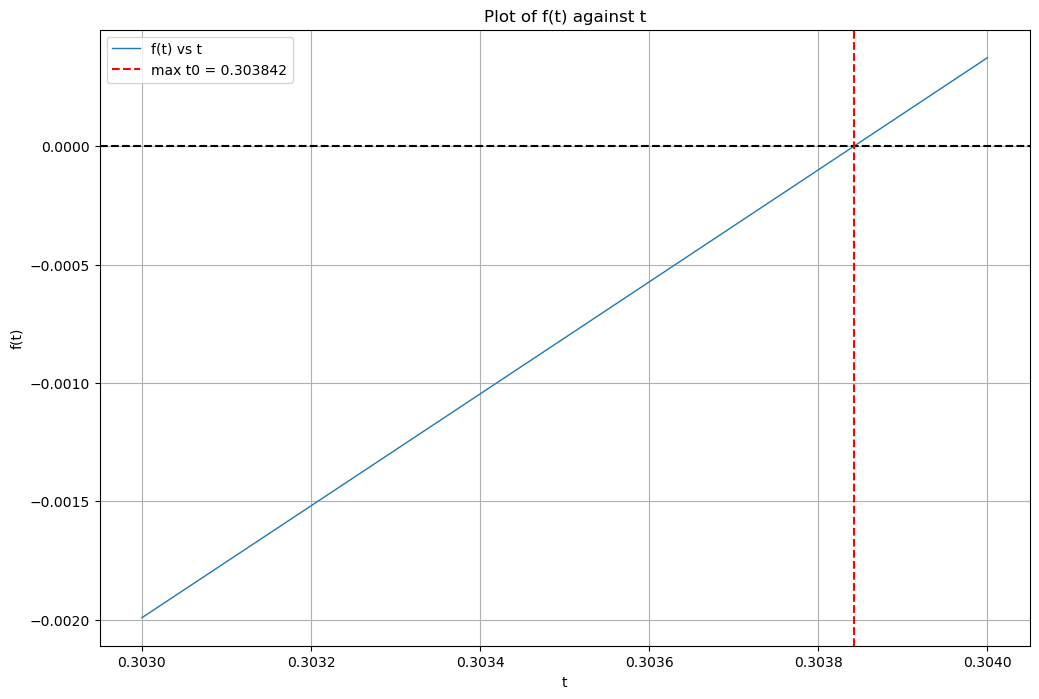

In [5]:
import math
import numpy as np

psi_bound = (2*math.sqrt(2/3)) / (math.cos(math.sqrt(2)) + 1)
print("L_infty bound for psi: ", psi_bound)

nabla_phi_bound = (math.sqrt(2/3)) / (math.cos(math.sqrt(2)) + 1)
print("L_infty bound for nabla phi: ", nabla_phi_bound)

def phi_bound(t):
    return math.sqrt((math.cosh(t/math.sqrt(6)) - math.cos(math.sqrt(2))) / (math.cosh(t/math.sqrt(6)) + math.cos(math.sqrt(2))))

def f(t):
    # t is a float scalar; phi_bound and psi_bound are expected to be defined earlier
    return math.exp(3*t**2) - math.exp(t**2) - 1.0/(2*max(1,(phi_bound(t) + t*psi_bound + t*nabla_phi_bound))**2)

def generate_T_vector(start=0.0, stop=0.2, steps=10001):
    """Generate a 1D array of t values from start to stop (inclusive) with 'steps' samples."""
    return np.linspace(start, stop, num=steps)

# --- User-adjustable parameters ---
start = 0.303
stop = 0.304
steps = 10001  # e.g. 10001 points gives step size 2e-5 over [0,0.2]

# Build T_vector and evaluate f(t)
T_vector = generate_T_vector(start, stop, steps)
i_values = np.array([f(float(t)) for t in T_vector])

# Find t values where f(t) < 0 and pick the maximum t (largest t that still satisfies the inequality)
valid_mask = i_values < 0
if not np.any(valid_mask):
    print('No t in the chosen range satisfies f(t) < 0')
    max_t_value = None
else:
    max_t_value = float(T_vector[valid_mask].max())
    print('Maximum t_0 value found:', max_t_value)

# Plot i_values against T_vector with a marker for the found maximum t0 (if any)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(T_vector, i_values, label='f(t) vs t', lw=1)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Plot of f(t) against t')
plt.axhline(0, color='k', linestyle='--')
if max_t_value is not None:
    plt.axvline(max_t_value, color='red', linestyle='--', label=f'max t0 = {max_t_value:.6f}')
plt.legend()
plt.grid(True)
plt.show()

<a name='4'></a>
## 4 - Plotting the bound into the simulation results graph for display

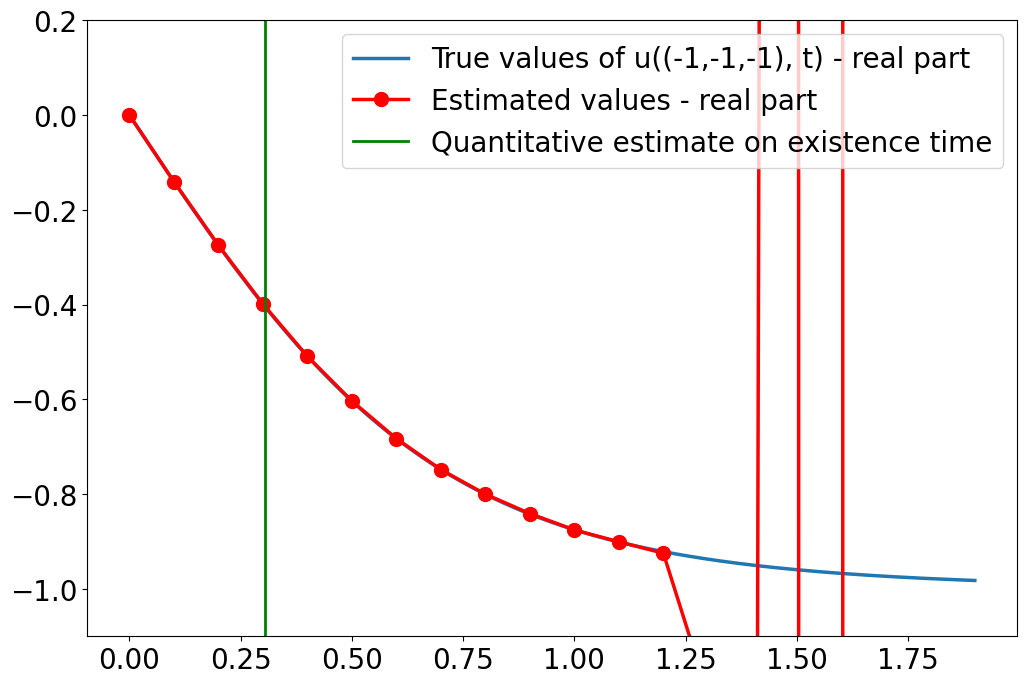

In [6]:
impose_ylim = True
y_lim = [-1.1,0.2]

true_values_real = np.asarray(np_dictionary["analytic"])[0,:]
true_values_real = np.reshape(true_values_real, (301,))[0:191]
t_values = np.arange(0, 1.91, 0.01)
estimated_values_real = np.asarray(np_dictionary["monte_carlo"])[0,:]
estimated_values_real = np.reshape(estimated_values_real, (31,))[0:19]
t_estimated = np.arange(0, 1.9, 0.1)

plt.figure(figsize=(12, 8))
plt.plot(t_values, true_values_real, label='True values of u((-1,-1,-1), t) - real part', lw=2.5)
plt.plot(t_estimated, estimated_values_real, 'ro-', label='Estimated values - real part', lw=2.5, ms=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.ylabel('true vs estimated values - real part')
if impose_ylim:
    plt.ylim(y_lim)
# plt.xlabel('t values')
plt.axvline(x=0.3038419,color='green', lw=2, label='Quantitative estimate on existence time')

# plt.title('True vs estimated values of u((-1,-1,-1), t) - real part')
plt.legend(loc='upper right',fontsize=20)
plt.show()

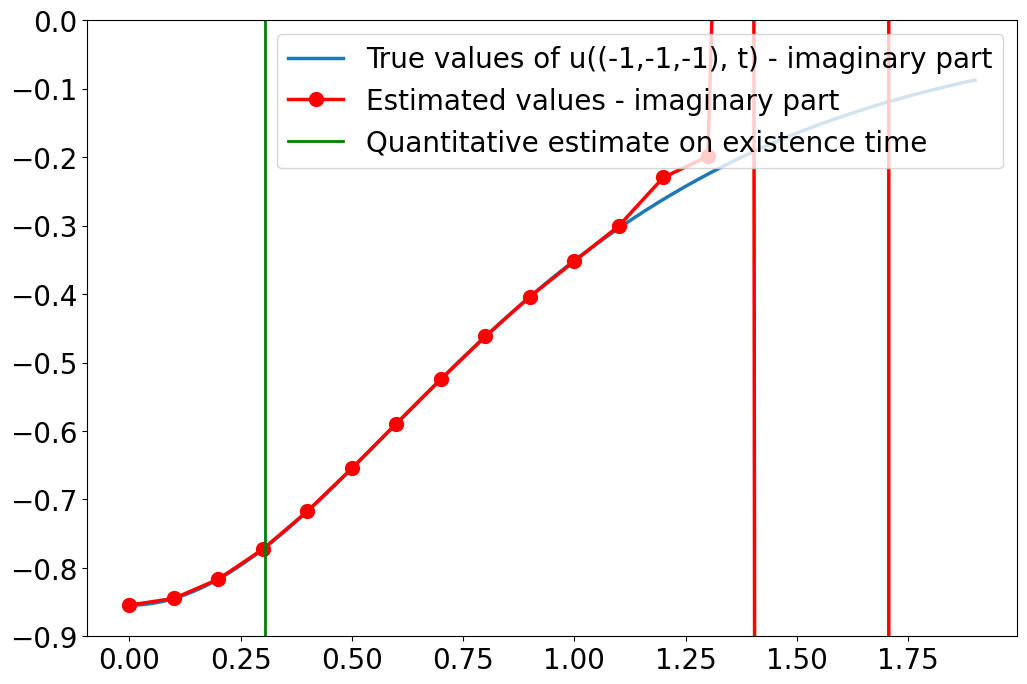

In [7]:
impose_ylim = True
y_lim = [-0.9,0]

true_values_imaginary = np.asarray(np_dictionary["analytic"])[1,:]
true_values_imaginary = np.reshape(true_values_imaginary, (301,))[0:191]
t_values = np.arange(0, 1.91, 0.01)
estimated_values_imaginary = np.asarray(np_dictionary["monte_carlo"])[1,:]
estimated_values_imaginary = np.reshape(estimated_values_imaginary, (31,))[0:19]
t_estimated = np.arange(0, 1.9, 0.1)

plt.figure(figsize=(12, 8))
plt.plot(t_values, true_values_imaginary, label='True values of u((-1,-1,-1), t) - imaginary part', lw=2.5)
plt.plot(t_estimated, estimated_values_imaginary, 'ro-', label='Estimated values - imaginary part', lw=2.5, ms=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.ylabel('true vs estimated values - imaginary part')
plt.ylabel('')
if impose_ylim:
    plt.ylim(y_lim)
# plt.xlabel('t values')
plt.xlabel('')
plt.axvline(x=0.3038419,color='green', lw=2, label='Quantitative estimate on existence time')

# plt.title('True vs estimated values of u((-1,-1,-1), t) - imaginary part')
plt.legend(loc='upper right',fontsize=20)
plt.show()